# Conditional likelihoods of trajectories

In [26]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from scipy import stats

import os

os.environ['GILLESPIE'] = '/dev/shm/Git/Gillespie/cmake-build-release/Gillespie'

In [27]:
matplotlib.rc_file_defaults()

In [28]:
from analyzer import analyzer

In [31]:
mutual_informations = np.squeeze(np.load('/data/mutual_information.npz')['arr_0'])
mutual_information = np.mean(mutual_informations, axis=(0,1))

In [32]:
mutual_informations.shape
num_s, num_r = mutual_informations.shape[0:2]

In [33]:
def subset_indices(num_responses, subset_signals, subset_responses):
    assert subset_responses <= num_responses
    indices = np.zeros((subset_signals * subset_responses, 2), dtype=int)
    for s in range(subset_signals):
        for r in range(subset_responses):
            indices[s*subset_responses + r] = [s, r]
    return indices.T
    

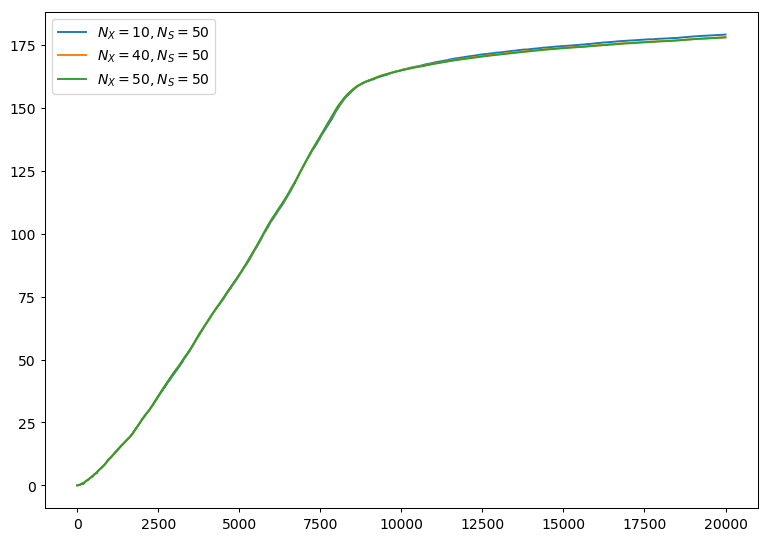

In [34]:
for r in [10, 40]:
    indices = subset_indices(num_r, num_s, r)
    subset_mean = np.mean(mutual_informations[indices[0], indices[1]], axis=0)
    plt.plot(np.arange(len(subset_mean)), subset_mean, label='$N_X={}, N_S={}$'.format(r, num_s))
plt.plot(np.arange(len(mutual_information)), mutual_information, label='$N_X={}, N_S={}$'.format(num_r, num_s))
plt.legend();

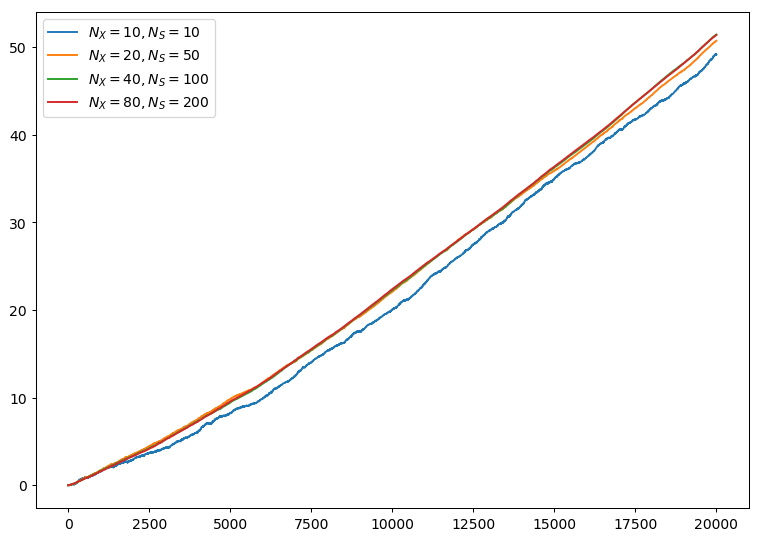

In [26]:
for s, r in [[10, 10], [50, 20], [100, 40]]:
    indices = subset_indices(num_r, s, r)
    subset_mean = np.mean(mutual_informations[indices[0], indices[1]], axis=0)
    plt.plot(np.arange(len(subset_mean)), subset_mean, label='$N_X={}, N_S={}$'.format(r, s))
plt.plot(np.arange(len(mutual_information)), mutual_information, label='$N_X={}, N_S={}$'.format(num_r, num_s))
plt.legend();

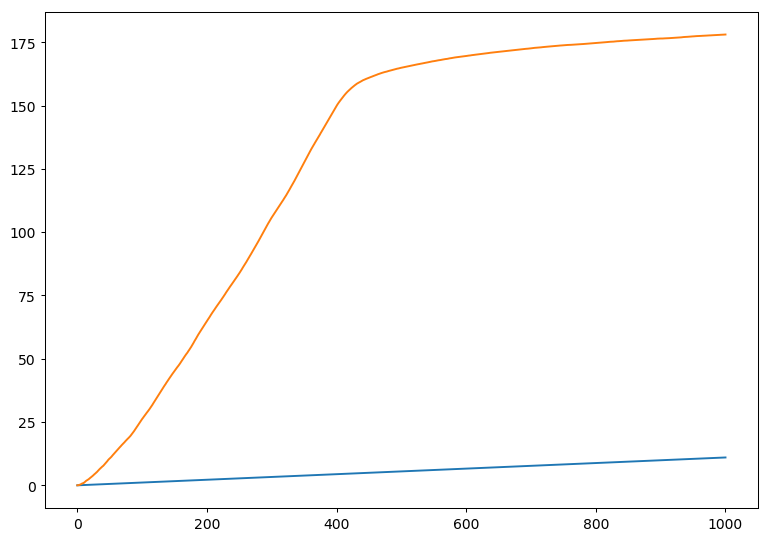

In [35]:
x = np.linspace(0, 1000, len(mutual_information))
plt.plot(x, 0.011 * x)
plt.plot(x, mutual_information, label='$N_X={}, N_S={}$'.format(num_r, num_s))

In [14]:
from pathlib import Path
analyzer.load_trajectory(Path('/data/signal/sig1.traj'))

{'components': {'S': array([500.        , 498.78770922, 499.19674291, ..., 592.79224337,
         592.56856601, 591.66489577])},
 'timestamps': array([0.00000e+00, 1.00001e-02, 2.00002e-02, ..., 9.99980e+02,
        9.99990e+02, 1.00000e+03])}

In [21]:
analyzer.simulate_trajectory('response', '/data/response.traj', ['/data/signal/sig1.traj'], seed=52)

/dev/shm/Git/Gillespie/CPP/cmake-build-release/Gillespie response.inp -s 52 -o /data/response.traj -t /data/signal/sig1.traj


In [22]:
analyzer.load_trajectory(Path('/data/response.traj'))

{'components': {'X': array([101., 100., 101., ...,  84.,  83.,  84.])},
 'random_variates': array([0.82337419, 0.42068436, 0.63521336, ..., 0.35125767, 0.31602497,
        0.63140149]),
 'reaction_events': array([0, 1, 0, ..., 1, 1, 0]),
 'reactions': [{'k': 0.02, 'reactants': ['S']},
  {'k': 0.1, 'reactants': ['X']}],
 'timestamps': array([9.71722587e-03, 5.28680496e-02, 7.55671156e-02, ...,
        1.00275715e+03, 1.00281409e+03, 1.00283693e+03])}